In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Import for train-test splitting
import datetime
import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")
df= df.drop(0)
df = df.sort_values('date', ascending=True)

forcast_col = 'close'
df.fillna(-99999, inplace=True)
forcast_out = int(math.ceil(0.1 * len(df) ))
df['predict_close_price'] = df[forcast_col].shift(-forcast_out)

X = np.array(df.drop(['predict_close_price', 'date', 'open', 'high', 'low', 'close'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out: ] 
X = X[:-forcast_out] 
df.dropna(inplace=True)
y = np.array(df['predict_close_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
df.head()

,date,close,volume,open,high,low,predict_close_price
756,2015/10/15,221.31,2835920.0000,216.43,221.7300,213.70,175.33
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.87,162.60
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.94,147.99
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.00,148.25
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.80,143.67


# Use Pickle With clf

In [3]:
with open ('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)
pickle_in = open

accuracy = clf.score(X_test, y_test)
forcast_set = clf.predict(X_lately)
print(forcast_set, accuracy, forcast_out)

[293.0915693  283.11531527 347.0587355  313.40890023 340.40636569
 295.55411578 288.87296393 298.56618157 274.78220399 279.1292773
 279.9375167  290.02546089 285.78577373 278.59836691 280.14796936
 276.24940435 306.58603977 299.34157492 286.01323372 273.43086214
 279.03974884 284.80393437 275.70299435 295.07363786 370.15140168
 320.52485018 293.86678005 408.95127531 377.33131171 337.76777771
 309.485059   303.82156625 285.58089802 296.66447003 280.86935139
 347.90998884 340.00392846 317.9222593  280.29788948 276.13908626
 268.07390302 317.47819064 289.18552316 287.99127999 286.94833945
 277.33044966 292.65542522 289.53969818 288.31586956 366.41161522
 323.57996121 297.12370966 301.51164751 282.37126027 284.58519194
 285.15152557 335.38090863 292.44560903 287.58403793 275.61640826
 274.55155643 272.66250649 290.21018865 287.6115992  424.60683473
 362.61313783 310.36766634 290.97400032 299.61650414 342.71821471
 319.08778304 312.13147244 316.01175195 291.73521916 286.83686319
 281.618685

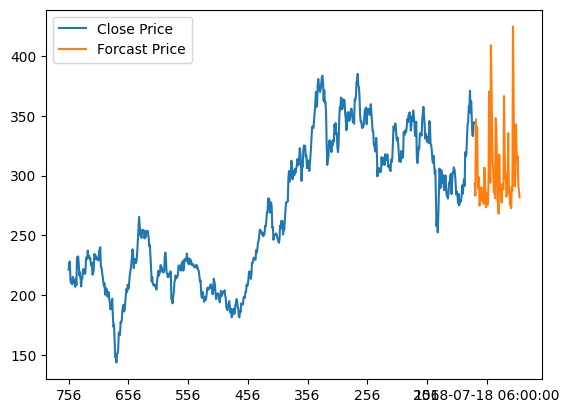

In [4]:
df['Forcast'] = np.nan

last_date_data = df.iloc[-1]['date']
last_date = pd.to_datetime(last_date_data)
one_day = 86400
last_unix = last_date.timestamp()
next_unix = last_unix + one_day
df.head()


for i in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1 )] + [i]

df['close'].plot(label="Close Price")
df['Forcast'].plot(label="Forcast Price")
plt.legend()
plt.show()